# Project 5:  Pandas, Numpy, and Visualization (100 Points)
# Due: 12/6/24 11:59 PM

# By: Jake Terry & Kayden Ewers


### Instructions
1. Find one partner that you trust in class.
2. Find a fairly large dataset of interest to you and your partner.
3. The dataset must be approximetly 1000 entries or rows and must have at least 10 features or columns.
4. I must approve your dataset and it must be different than other groups.
5. You may change your dataset later, but I must still approve it.
6. Your job as a group is to present this data.  Tell the story of this data.
7. Show the story of this data through graphs charts and visual media generated by code, be creative.
8. You must design at least 6 different graphs or charts using code.
9. Compute summary statistics on the data.
10. Once you have completed this process you will present this information.
11. You may choose to present the information in a video or live to the class.
12. You will need to create a presentation for the data, do not simply display and talk about your code.
13. In the presentation you will need to summerize this data and tell us about it.
14. Use the pandas or numpy libraries to work through this project.
15. Your partner and you will receive the same grade for the project.



In [1]:
# May need to pip these libraries
# !pip install plotly_express
# !pip install folium
# !pip install nbformat
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
# !pip install numpy

In [2]:

# import libraries
import plotly_express as px
import folium
from folium.plugins import HeatMap
import nbformat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/jake/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# open crime data and create a data frame
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# use only relevant columns
df = df[['DR_NO' ,'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'LOCATION', 'LAT', 'LON']]




# create a dictionary of keywords and severity levels, where 10 is most severe
severity_mapping = {
    "HOMICIDE": 10, # murder
    "BATTERY": 9, # battery, weapon, and other are all forms of assault that are not domestic violence
    "WEAPON": 9, # had to separate assault crimes into two categories to to avoid skewing the data
    "OTHER": 9, 
    "INTIMATE": 8, # intimate and child are assault charges that would be considered domestic violence
    "CHILD": 8,
    "IDENTITY": 7, # identity theft/fraud
    "ROBBERY": 6, # robbery
    "GRAND": 5, # any theft that is of GRAND type
    "BURGLARY": 4, # burglary
    "VANDALISM": 3, # vandalism
    "PETTY": 2, # any theft that is of PETTY type
    "PEACE": 1} # disturbing the peace

# formula to assign the severity levels if Crm Cd Desc contains keywords from severity dictonary
def assign_severity(description):
    for keyword, severity in severity_mapping.items(): 
        if keyword in description: # checks if a keyword from the severity_mapping tuple is in the description of Crm Cd Desc column
            return severity # if a keyword is found, return the integer value from the tuple
    return 0  # if crm cd desc does not contain keyword, it is irrelevant and assigned a 0

# create a column for severity
df['Severity'] = df['Crm Cd Desc'].apply(assign_severity) 

# Filter rows based on column: 'Crm Cd Desc'
# used an extension in VS Code called Data Wrangler to sort and filter the data frame for only crimes containing specific keywords
# Data Wrangler uses a block coding format to output the code based on the filters set by user
test_data = df[(df['Crm Cd Desc'].str.contains("HOMICIDE", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("assault", regex=False, na=False, case=False)) & (~df['Crm Cd Desc'].str.contains("intimate", regex=False, na=False, case=False)) & (~df['Crm Cd Desc'].str.contains("child", regex=False, na=False, case=False)) |
        (df['Crm Cd Desc'].str.contains("BURGLARY", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("ROBBERY", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("THEFT", regex=False, na=False)) & (df['Crm Cd Desc'].str.contains("GRAND", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("VANDALISM", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("PETTY", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("PEACE", regex=False, na=False)) | 
        (df['Crm Cd Desc'].str.contains("assault", regex=False, na=False, case=False)) & (~df['Crm Cd Desc'].str.contains("battery", regex=False, na=False, case=False)) & (~df['Crm Cd Desc'].str.contains("weapon", regex=False, na=False, case=False)) & (~df['Crm Cd Desc'].str.contains("other", regex=False, na=False, case=False)) | 
        (df['Crm Cd Desc'].str.contains("IDENTITY", regex=False, na=False))]

# to reduce processing load, randomly stratified sample of 10,0000
test_data = test_data.sample(n=10000, random_state=69) # random state is the seed used to randomly pick from the sample pool


test_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,LAT,LON,Severity
356074,210104280,01/07/2021 12:00:00 AM,01/04/2021 12:00:00 AM,1200,1,Central,310,BURGLARY,0,M,O,707.0,GARAGE/CARPORT,NaN,NaN,1600 S MAIN ST,34.0332,-118.2629,4
550731,222018450,08/24/2022 12:00:00 AM,08/19/2022 12:00:00 AM,1402,20,Olympic,440,THEFT PLAIN - PETTY ($950 & UNDER),27,M,B,504.0,OTHER RESIDENCE,NaN,NaN,700 S NORMANDIE AV,34.0597,-118.2998,2
247651,211107634,04/14/2021 12:00:00 AM,04/14/2021 12:00:00 AM,2130,11,Northeast,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",50,M,X,108.0,PARKING LOT,512.0,MACE/PEPPER SPRAY,4600 FRANKLIN AV,34.1054,-118.2901,9
83687,200606982,02/26/2020 12:00:00 AM,02/25/2020 12:00:00 AM,2100,6,Hollywood,625,OTHER ASSAULT,62,M,W,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",VINE ST,34.0998,-118.3267,9
308049,211815735,08/24/2021 12:00:00 AM,08/24/2021 12:00:00 AM,2040,18,Southeast,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",20,F,H,103.0,ALLEY,106.0,UNKNOWN FIREARM,111TH ST,33.9347,-118.2848,9


In [4]:
# check size of data
# proof sample size still meets requirements of the project
test_data.shape

(10000, 19)

Text(0.5, 0, 'Age')

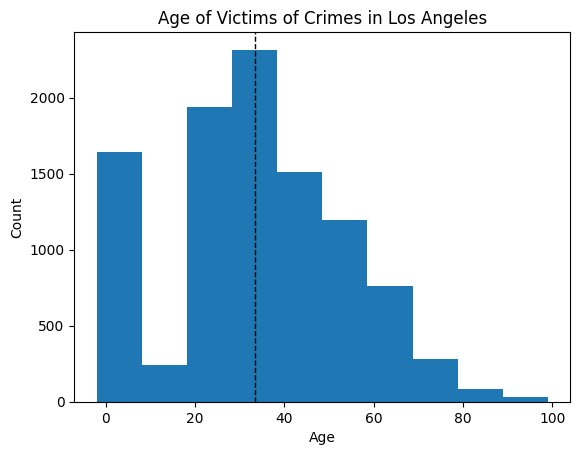

In [13]:
# Age Histogram using matplotlib
plt.hist(test_data['Vict Age']) #histogram using the Vict Age category
plt.axvline(test_data['Vict Age'].mean(), color='k', linestyle='dashed', linewidth=1) # dashed line represents mean of vict age
plt.title('Age of Victims of Crimes in Los Angeles') 
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 28.999999999999986, 'Victim Sex')

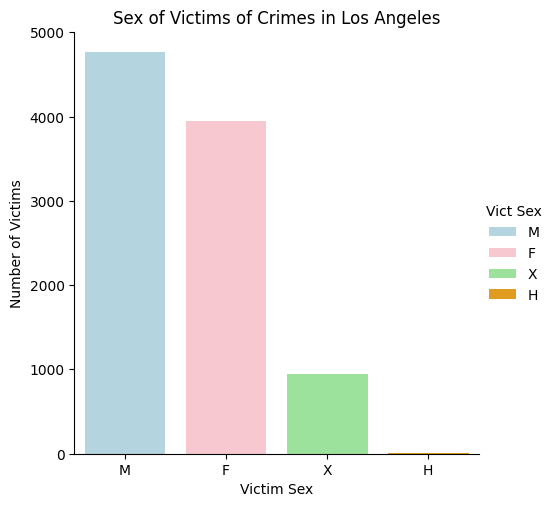

In [ ]:
# Catplot of Victim Sex using seaborn
sns.catplot(x='Vict Sex', # using vict sex column 
            data=test_data,  # use data frame sample
            kind='count', # count the sex of each
            hue='Vict Sex', # set color based on sex
            palette={'F':'pink', 'M':'lightblue', 'X':'lightgreen', 'H':'orange'}) # choose colors
plt.title("Sex of Victims of Crimes in Los Angeles")
plt.ylabel('Number of Victims')
plt.xlabel('Victim Sex')

Text(0, 0.5, '')

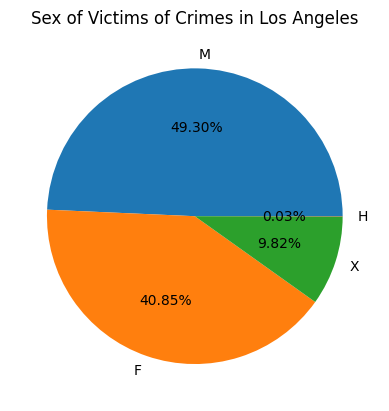

In [7]:
# a pie chart using the victim sex
test_data['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.2f%%') # autopct shows percertanges to the 2nd decimal place
plt.title('Sex of Victims of Crimes in Los Angeles')
plt.ylabel('') # remove y-axis label

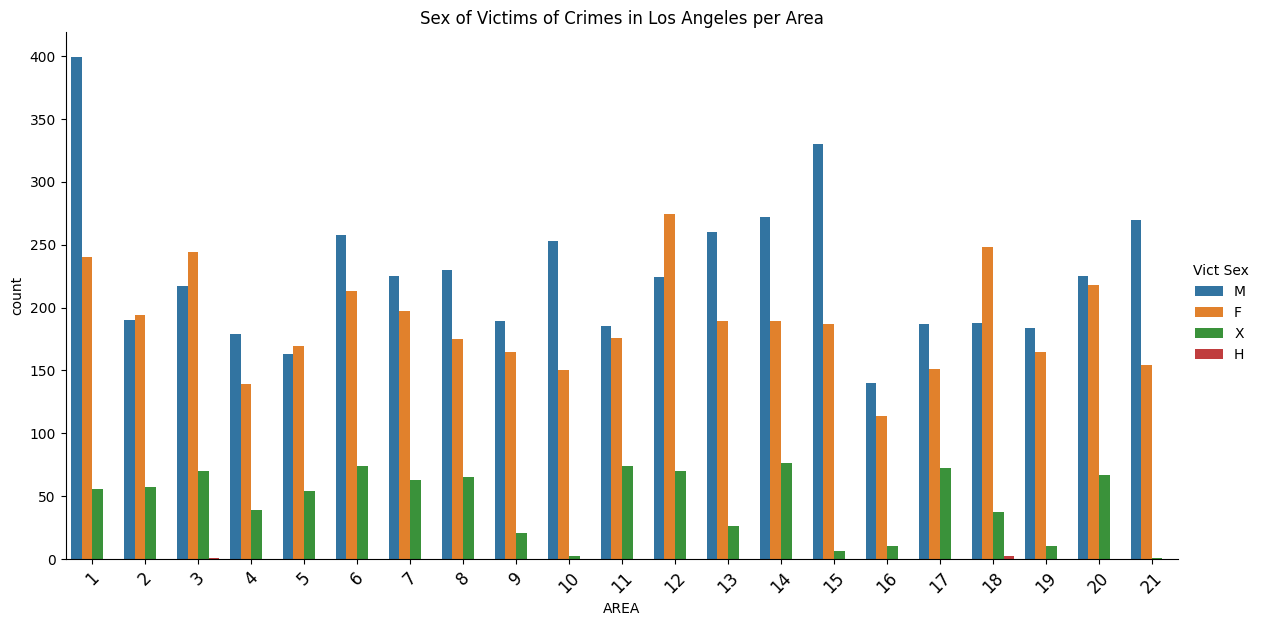

In [8]:
# cat plot showing the victim sex count per area of los angeles
sns.catplot(x='AREA', data=test_data, hue='Vict Sex', kind='count', height=6, aspect=2)  # Adjust aspect ratio for wider x-axis

# adjust the x-axis label size
plt.xticks(fontsize=12, rotation=45)  # increase fontsize and rotate for readability
plt.title('Sex of Victims of Crimes in Los Angeles per Area')

plt.show()


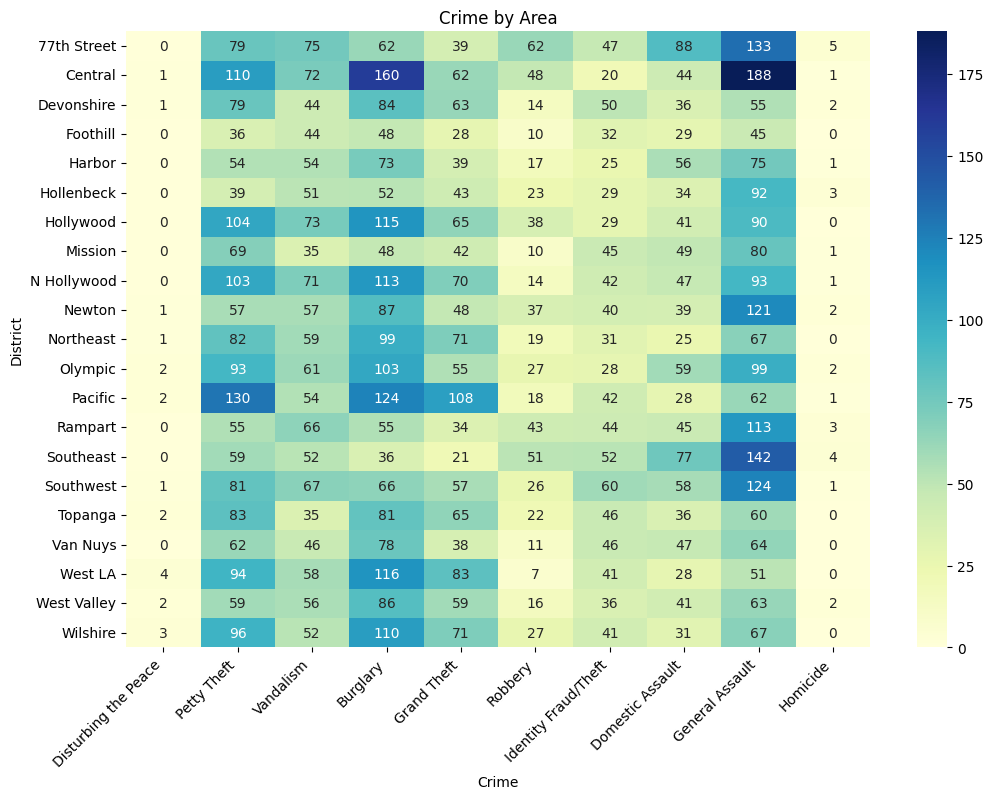

In [9]:
# group data by AREA NAME then count how many of each Severity value appears per AREA NAME
htgraph = test_data.groupby('AREA NAME')['Severity'].value_counts().unstack().fillna(0) # fillna(0) sets any value with NA to 0



# Plot heatmap
custom_labels = ['Disturbing the Peace', 'Petty Theft', 'Vandalism', 'Burglary', 'Grand Theft', 
                 'Robbery', 'Identity Fraud/Theft', 'Domestic Assault', 'General Assault', 'Homicide'] # used for x-axis labels
plt.figure(figsize=(12, 8)) # sets chart size
crime_by_area = sns.heatmap(htgraph, cmap='YlGnBu', annot=True, fmt=".0f") # use yellow green and blue and show values without decimals
crime_by_area.set_xticklabels(custom_labels, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.title("Crime by Area")
plt.xlabel('Crime')
plt.ylabel('District')
plt.show()


In [15]:
# create a density map using plotly_express
fig = px.density_mapbox(test_data, lat='LAT', lon='LON', z='Severity', radius=4.5, # radius sets the size of each point
                        center=dict(lat=test_data.LAT.mean(), lon=test_data.LON.mean()), # centers map over the mean lat and lon of data
                        zoom=4, mapbox_style='open-street-map', height=1500, width=1500) # uses open street map for mapping purposes

fig.show()

# create a heat map using folium

LA_heatmap = folium.Map(location=[test_data.LAT.mean(), test_data.LON.mean()], # similarly use mean lat and long to center map
               zoom_start=6, control_scale=True)  # control_scale shows kiloments/miles

map_values = test_data[['LAT', 'LON', 'Severity']] # extract values from these columns in the data frame
data = map_values.values.tolist() # creates numPy array
hm = HeatMap(data, min_opacity=0.05, max_opacity=0.9, radius=30).add_to(LA_heatmap) # using numPy array, set opacity for a heatmap using folium.plugins 

LA_heatmap # generate heatmap